In [109]:
import pandas as pd
from geopy.geocoders import Nominatim 
!pip install geocoder
import geocoder
import folium
from folium.plugins import FloatImage

In [89]:
t42a = pd.read_excel(r"C:\Users\yousof.aly\Desktop\Tasks\WWW\MI_landfill_PFAS.xlsx" , sheet_name = 'Table 4-2A')
t42ba = pd.read_excel(r"C:\Users\yousof.aly\Desktop\Tasks\WWW\MI_landfill_PFAS.xlsx" , sheet_name = 'Table 4-2BA')
t42bb = pd.read_excel(r"C:\Users\yousof.aly\Desktop\Tasks\WWW\MI_landfill_PFAS.xlsx" , sheet_name = 'Table 4-2BB')
t42bc = pd.read_excel(r"C:\Users\yousof.aly\Desktop\Tasks\WWW\MI_landfill_PFAS.xlsx" , sheet_name = 'Table 4-2BC')

In [90]:
address = 'Michigan'

geolocator = Nominatim(user_agent="MI_explorer", timeout = 3)
location = geolocator.geocode(address)
milat = location.latitude
milong = location.longitude
print('The geograpical coordinate of Michigan are {}, {}.'.format(milat, milong))

The geograpical coordinate of Michigan are 43.6211955, -84.6824346.


In [91]:
addresses = t42a.iloc[:,1]
lat = []
lng = []
for address in addresses:
    location = geolocator.geocode(address)
    try:
        lat.append(location.latitude)
        lng.append (location.longitude)
    except: 
        lat.append('NA')
        lng.append ('NA')
        
t42a['Lat'] = lat
t42a['Lng'] = lng
t42a[t42a['Lat'] == 'NA']

,LF,Address,LV,PFOA,PFOS,PFOA Daily,PFOS Daily,Lat,Lng
0,Arbor Hills Landfill,"10690 Six Mile Rd, Northville, MI 48168",98400,3200,220,0.00260,0.00018,NA,NA
3,C&C Expanded Sanitary Landfill,"14800 P DR N MARSHALL, MI 49068",42000,1300,450,0.00040,0.00015,NA,NA
6,Citizen's Disposal Inc.,"2361 W GRAND BLANC GRAND BLANC, MI 48439",32900,1100,180,0.00030,0.00005,NA,NA
9,Glens Sanitary Landfill,"518 E. Traverse Hwy. Maple City, MI 49664",3800,770,210,0.00002,0.00001,NA,NA
10,Granger Grand River Landfill,"8550 W GRAND RIVER HWY GRAND LEDGE, MI 48837",64400,240,160,0.00010,0.00009,NA,NA
12,K&W Landfill,"11877 State Highway M38 Ontonagon, MI 49953",17500,830,170,0.00010,0.00002,NA,NA
18,Orchard Hill Sanitary Landfill,"3290 Hennessey Road, Watervliet, MI 49098",12500,650,110,0.00010,0.00001,NA,NA
20,People's Landfill,"4143 East Rathbun Rd. Birch Run, MI 48415",21900,2500,710,0.00050,0.00013,NA,NA
22,Pitsch Sanitary Landfill,"7905 Johnson Rd. Belding, MI 48809",15000,1300,260,0.00020,0.00003,NA,NA
25,Tri-City RDF,"426 North Ruth Rd. Carsonville, MI 48419",9600,1200,160,0.00010,0.00001,NA,NA


In [93]:
t42a.at[0, 'Lat'] = 42.410534
t42a.at[0, 'Lng'] = -83.562455

t42a.at[3, 'Lat'] = 42.362980
t42a.at[3, 'Lng'] = -85.033675

t42a.at[6, 'Lat'] = 42.911375
t42a.at[6, 'Lng'] = -83.724699

t42a.at[9, 'Lat'] = 44.788840
t42a.at[9, 'Lng'] = -85.847909

t42a.at[10, 'Lat'] = 42.789759
t42a.at[10, 'Lng'] = -84.691708

t42a.at[12, 'Lat'] = 46.786463
t42a.at[12, 'Lng'] = -89.128742

t42a.at[18, 'Lat'] = 42.174334
t42a.at[18, 'Lng'] = -86.283150

t42a.at[20, 'Lat'] = 43.283096
t42a.at[20, 'Lng'] = -83.871234

t42a.at[22, 'Lat'] = 43.104132
t42a.at[22, 'Lng'] = -85.170941

t42a.at[25, 'Lat'] = 43.437032 
t42a.at[25, 'Lng'] = -82.731291

t42a.at[28, 'Lat'] = 44.858289
t42a.at[28, 'Lng'] = -84.665372

t42a

,LF,Address,LV,PFOA,PFOS,PFOA Daily,PFOS Daily,Lat,Lng
0,Arbor Hills Landfill,"10690 Six Mile Rd, Northville, MI 48168",98400,3200,220,0.002600,0.000180,42.4105,-83.5625
1,Autumn Hills RDF Landfill,"700 56th Ave, Zeeland, MI 49464",54800,1300,380,0.000600,0.000170,42.7732,-85.9208
2,Brent Run Landfill,"8335 Vienna Rd, Montrose, MI 48457",16400,540,110,0.000100,0.000020,43.1762,-83.9155
3,C&C Expanded Sanitary Landfill,"14800 P DR N MARSHALL, MI 49068",42000,1300,450,0.000400,0.000150,42.363,-85.0337
4,Carleton Farms Landfill,"8800 Clark Rd, New Boston, MI 48164",123300,1800,250,0.001800,0.000260,42.1561,-83.4224
5,Central Sanitary Landfill,"21545 W Cannonsville Rd, Pierson, MI 49339",30100,2500,470,0.000600,0.000120,43.3377,-85.5001
6,Citizen's Disposal Inc.,"2361 W GRAND BLANC GRAND BLANC, MI 48439",32900,1100,180,0.000300,0.000050,42.9114,-83.7247
7,Dafter Sanitary Landfill,"3962 West 12 Mile Rd. Dafter, MI 49724",16500,680,130,0.000100,0.000020,46.3319,-84.4454
8,Eagle Valley RDF,"600 West Silver Bell Rd. Orion, MI 48359",32900,490,170,0.000100,0.000050,42.7241,-83.2041
9,Glens Sanitary Landfill,"518 E. Traverse Hwy. Maple City, MI 49664",3800,770,210,0.000020,0.000010,44.7888,-85.8479


In [94]:
addresses = t42ba.iloc[:,0]
lat = []
lng = []
for address in addresses:
    location = geolocator.geocode(address+', MI')
    try:
        lat.append(location.latitude)
        lng.append (location.longitude)
    except: 
        lat.append('NA')
        lng.append ('NA')

t42ba['Lat'] = lat
t42ba['Lng'] = lng

In [95]:
t42ba.at[3, 'Lat'] = 43.195628
t42ba.at[3, 'Lng'] = -83.856839

t42ba.at[10, 'DF'] = 'Sandusky'
t42ba.at[10, 'Lat'] = 43.420024
t42ba.at[10, 'Lng'] = -82.831913

t42ba.at[12, 'Lat'] = 42.885267
t42ba.at[12, 'Lng'] = -85.724076

t42ba.at[13, 'Lat'] = 42.260503
t42ba.at[13, 'Lng'] = -83.554378

t42ba.at[6, 'Lat'] = 42.645914
t42ba.at[6, 'Lng'] = -85.289454

t42ba

,DF,Capacity,PFOA,PFOS,PFOA Daily,PFOS Daily,Lat,Lng
0,Belding,3.07,0.000,0.000,0.0000,0.0000,43.0978,-85.2289
1,Menominee,3.20,12.000,5.600,0.0003,0.0001,45.5786,-87.5622
2,Clinton River,30.60,4.940,7.680,0.0013,0.0019,42.6242,-83.3162
3,Genesee Co-Ragnone,25.90,4.000,5.220,0.0009,0.0012,43.1956,-83.8568
4,GLWA,650.00,6.020,7.540,0.0324,0.0406,42.239,-83.3561
5,Grand Rapids,61.10,5.060,12.700,0.0026,0.0066,42.9632,-85.6679
6,Hastings,2.00,0.000,0.000,0.0000,0.0000,42.6459,-85.2895
7,Holland,12.00,8.930,3.790,0.0009,0.0004,42.7876,-86.1091
8,Lansing,35.00,4.980,0.000,0.0014,0.0000,42.7338,-84.5554
9,Ludington,4.50,0.000,0.000,0.0000,0.0000,43.9555,-86.4477


In [96]:
addresses = t42bb.iloc[:,0]
lat = []
lng = []
for address in addresses:
    location = geolocator.geocode(address+', MI')
    try:
        lat.append(location.latitude)
        lng.append (location.longitude)
    except: 
        lat.append('NA')
        lng.append ('NA')

t42bb['Lat'] = lat
t42bb['Lng'] = lng



In [98]:
t42bb.at[0, 'Lat'] = 43.595294
t42bb.at[0, 'Lng'] =-83.890217

t42bb.at[4, 'Lat'] = 46.343187
t42bb.at[4, 'Lng'] = -87.386007

t42bb.at[6, 'Lat'] = 43.059467 
t42bb.at[6, 'Lng'] = -85.610112

t42bb.at[8, 'Lat'] = 42.101199
t42bb.at[8, 'Lng'] =-83.405800

t42bb

,DF,Capacity,PFOA,PFOS,PFOA Daily,PFOS Daily,Lat,Lng
0,Bay City,18.00,4.87,18.2,0.0007,0.0027,43.5953,-83.8902
1,Downriver,125.00,7.20,22.2,0.0075,0.0230,42.2172,-83.2409
2,Flint,50.00,10.30,62.4,0.0043,0.0258,43.0172,-83.7236
3,Kalamazoo,53.50,0.00,0.0,0.0000,0.0000,42.2917,-85.5872
4,KI Sawyer,0.65,0.00,0.0,0.0000,0.0000,46.3432,-87.386
5,Muskegon Co Metro,43.00,24.30,17.4,0.0131,0.0086,43.2763,-86.2776
6,North Kent S A,8.00,11.20,31.1,0.0007,0.0021,43.0595,-85.6101
7,Port Huron,20.00,64.60,19.5,0.0107,0.0032,42.9816,-82.4405
8,S Huron Valley UA (SHUVA),24.00,3.76,0.0,0.0007,0.0000,42.1012,-83.4058


In [99]:
addresses = t42bc.iloc[:,0]
lat = []
lng = []
for address in addresses:
    location = geolocator.geocode(address+', MI')
    try:
        lat.append(location.latitude)
        lng.append (location.longitude)
    except: 
        lat.append('NA')
        lng.append ('NA')

t42bc['Lat'] = lat
t42bc['Lng'] = lng

In [106]:
t42bc.at[1, 'DF'] = 'Alpena'
t42bc.at[1, 'Lat'] = 45.066839
t42bc.at[1, 'Lng'] = -83.440254

t42bc.at[14, 'Lat'] = 43.092527
t42bc.at[14, 'Lng'] = -83.615214

t42bc.at[29, 'DF'] = 'Saginaw'
t42bc.at[29, 'Lat'] = 43.419596
t42bc.at[29, 'Lng'] = -83.949757

t42bc.at[33, 'Lat'] = 44.290062 
t42bc.at[33, 'Lng'] = -83.492349

t42bc.at[35, 'DF'] = 'West Bay County Regional'
t42bc.at[35, 'Lat'] = 43.628047
t42bc.at[35, 'Lng'] = -83.870574

t42bc.at[37, 'Lat'] = 42.806643
t42bc.at[37, 'Lng'] = -86.015066

t42bc.at[8, 'Lat'] = 42.563476
t42bc.at[8, 'Lng'] = -84.834584

t42bc.at[16, 'Lat'] = 43.177176
t42bc.at[16, 'Lng'] = -85.250912

t42bc.at[20, 'Lat'] = 42.266658
t42bc.at[20, 'Lng'] = -84.409991

t42bc.at[25, 'Lat'] = 42.084682
t42bc.at[25, 'Lng'] = -83.688084

t42bc.at[30, 'Lat'] = 42.167012
t42bc.at[30, 'Lng'] = -83.783421

t42bc.at[10, 'Lat'] = 42.626582
t42bc.at[10, 'Lng'] = -84.531456

t42bc.at[7, 'Lat'] = 41.872532
t42bc.at[7, 'Lng'] = -85.195144

t42bc.at[24, 'Lat'] = 42.912956
t42bc.at[24, 'Lng'] = -82.486436


t42bc

,DF,Capacity,PFOA,PFOS,PFOA Daily,PFOS Daily,Lat,Lng
0,Adrian,7.000,0.000,0.00,0.0000,0.0000,41.8975,-84.0373
1,Alpena,5.500,5.940,5.44,0.0003,0.0002,45.0668,-83.4403
2,Ann Arbor,29.500,3.605,18.25,0.0011,0.0049,42.2682,-83.7312
3,AuGres,0.221,0.000,0.00,0.0000,0.0000,43.9889,-83.6823
4,Battle Creek,18.000,0.000,0.00,0.0000,0.0000,42.3193,-85.1824
5,Benton Harbor – St. Joseph,15.300,0.000,0.00,0.0000,0.0000,42.074,-86.4378
6,Boyne City,0.900,0.000,0.00,0.0000,0.0000,45.2167,-85.0139
7,Bronson,0.500,0.000,12.00,0.0000,0.0001,41.8725,-85.1951
8,Charlotte,1.800,0.000,0.00,0.0000,0.0000,42.5635,-84.8346
9,Commerce Twp,8.500,17.900,6.38,0.0013,0.0004,42.5692,-83.4997


In [114]:
map = folium.Map(location=[milat, milong], zoom_start = 7)
for location in t42a.itertuples():
    label = 'Landfill: {}, PFOA (ppt): {:.0f}, PFOS (ppt): {:.0f}, PFOS+PFOA (ppt): {:.0f}'.format(location[1], location[3], location[4], (location[3]+location[4]))
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker([location[-2], location[-1]],
                       radius =1,
                      color = 'blue',
                      fill = True,
                      fill_color='#3186cc',
                      fill_opacity = 0.7,
                       parase_html=False).add_to(map)
    folium.Circle(radius=(location[4]+location[5]*20), 
                 popup=label, 
                 location=[location[-2], location[-1]], 
                 color='#3186cc', 
                 fill=True, 
                 fill_color='#3186cc').add_to(map)
for location in t42ba.itertuples():
    label = 'WRRF: {}, PFOA (ppt): {:.0f}, PFOS (ppt): {:.0f}, PFOS+PFOA (ppt): {:.0f}'.format(location[1], location[3], location[4], (location[3]+location[4]))
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker([location[-2], location[-1]],
                      radius =1,
                      color = 'red',
                      fill = True,
                      fill_color='red',
                      fill_opacity = 0.7,
                       parase_html=False).add_to(map)
    folium.Circle(radius=(location[3]+location[4]*20), 
                 popup=label, 
                 location=[location[-2], location[-1]], 
                 color='red', 
                 fill=True, 
                 fill_color='red').add_to(map)
    
for location in t42bb.itertuples():
    label = 'WRRF: {}, PFOA (ppt): {:.0f}, PFOS (ppt): {:.0f}, PFOS+PFOA (ppt): {:.0f}'.format(location[1], location[3], location[4], (location[3]+location[4]))
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker([location[-2], location[-1]],
                      radius =1,
                      color = 'green',
                      fill = True,
                      fill_color='green',
                      fill_opacity = 0.7,
                       parase_html=False).add_to(map)
    folium.Circle(radius=(location[3]+location[4]*20), 
                 popup=label, 
                 location=[location[-2], location[-1]], 
                 color='green', 
                 fill=True, 
                 fill_color='green').add_to(map)
    
for location in t42bc.itertuples():
    label = 'WRRF: {}, PFOA (ppt): {:.0f}, PFOS (ppt): {:.0f}, PFOS+PFOA (ppt): {:.0f}'.format(location[1], location[3], location[4], (location[3]+location[4]))
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker([location[-2], location[-1]],
                      radius =1,
                      color = 'orange',
                      fill = True,
                      fill_color='orange',
                      fill_opacity = 0.7,
                       parase_html=False).add_to(map)
    folium.Circle(radius=(location[3]+location[4]*20), 
                 popup=label, 
                 location=[location[-2], location[-1]], 
                 color='orange', 
                 fill=True, 
                 fill_color='orange').add_to(map)
    
map
    

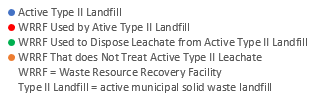

In [115]:
map.save('index.html')